In [22]:
# -*- coding: utf-8 -*-
import ctypes# give location of dll
from ctypes import c_int, c_bool, c_long, c_void_p, c_float, c_double, c_char, c_char_p, c_ulong, byref, create_string_buffer
import time, os
import numpy as np


from ctypes import cdll

TLCCS_STATUS_SCAN_IDLE         = 0x0002      #// CCS waits for new scan to execute
TLCCS_STATUS_SCAN_TRIGGERED    = 0x0004      #// scan in progress
TLCCS_STATUS_SCAN_START_TRANS  = 0x0008      #// scan starting
TLCCS_STATUS_SCAN_TRANSFER     = 0x0010      #// scan is done, waiting for data transfer to PC
TLCCS_STATUS_WAIT_FOR_EXT_TRIG = 0x0080      #/ same as IDLE except that external trigger is armed

class CCS200():
#libDLL = ctypes.windll.LoadLibrary("TLCCS_64.dll")
    libDLL = 1#cdll.LoadLibrary( os.path.abspath(__file__).split('CCS200.py')[0]+"TLCCS_64.dll")

    def __init__(self):
        pass

    rscStr_ = b'USB0::0x1313::0x8089::M00310899::RAW'
    rscStr = create_string_buffer(256,rscStr_)
    instr = c_long(0)


    def init(self):
        #print(self.libDLL)
        #tlccs_init = self.libDLL['tlccs_init']
        #tlccs_init.argtypes = (c_char_p, c_int, c_int, ctypes.POINTER(c_long))
        #tlccs_init.restype = c_char
        #r= tlccs_init(self.rscStr_,0,0,self.instr)
        r = 1
        if not r == b'\x00': print("init>",self.instr.value, self.error_message(r))
        return r
    
    def close(self):
    #tlccs_close = self.libDLL['tlccs_close']
        r = 1
        if not r == b'\x00': print("close>",self.instr.value, self.error_message(r))
        return r

    
    def error_message(self,err):
        buf = create_string_buffer(256)
        r = 1# tlccs_error_message(self.instr, err, buf)
        return buf.value


    def setIntegrationTime(self, val=0.1):
        r = 1#tlccs_setIntegrationTime(self.instr, val)
        if not r == b'\x00': print("setIntegrationTime>",self.instr.value, self.error_message(r))
        return r

    def startScan(self):
        r = 1#tlccs_startScan(self.instr)
        if not r == b'\x00': print("startScan>",self.instr.value, self.error_message(r))
        return r
    
    
    def startScanExtTrg(self):
        r = 1#tlccs_startScanExtTrg(self.instr)
        if not r == b'\x00': print("startScanExtTrg>",self.instr.value, self.error_message(r))
        return r

    def getDeviceStatus(self):
        status = ctypes.c_long(0)
        r = 1#tlccs_getDeviceStatus(self.instr, status)
        if not r == b'\x00': print("getDeviceStatus>",self.instr.value, self.error_message(r))
        return status.value

    def getScanData(self):
        data = abs(np.random.normal(1)*np.exp(-(np.arange(0,3648)-1500)**2/10))
        r = 1#tlccs_getScanData(self.instr, data)
        if not r == b'\x00': print("getScanData>",self.instr.value, self.error_message(r))
        return [d for d in data]


SyntaxError: invalid syntax (<ipython-input-22-1f1849e36865>, line 18)

In [18]:
c = CCS200()
print(c.init())
print(c.setIntegrationTime(0.01))
data = []

init> 0 b''
1
setIntegrationTime> 0 b''
1


startScanExtTrg> 0 b''
1
getDeviceStatus> 0 b''
0
getScanData> 0 b''
close> 0 b''
1
startScanExtTrg> 0 b''
1
getDeviceStatus> 0 b''
0
getScanData> 0 b''
close> 0 b''
1


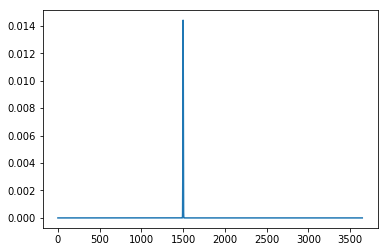

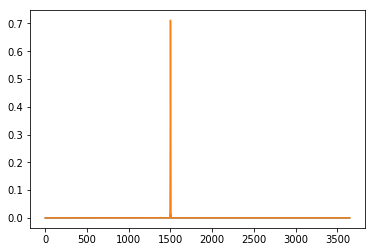

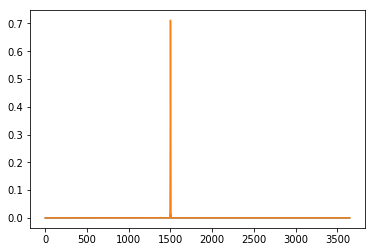

In [21]:
for i in range(2):
    print(c.startScanExtTrg())
    print(c.getDeviceStatus())
    d = c.getScanData()
    data.append(d)
    print(c.close())
from pylab import *
for i in data:
    plot(i)
    show(0)